# Assignment, Module 8
## DAV-6300-1: Experimental Optimization
David Sweet // Fall 2024

# Question 1

Let's build a Thompson Sampler.

First, we need some observations. Take a look at the function `observe()`. It will return a reward each time it is called. You provide the version name (aka arm name) -- either "A" or "B".

a) What is the expected reward for each version? (You should be able to tell just by reading the code.)

In [1]:
import numpy as np

def observe(version):
    if version == "A":
        return 1 + 10*np.random.normal()
    elif version == "B":
        return -1 + 10*np.random.normal()
    else:
        assert False, "Invalid version. Use A or B."


- Expected reward for version A = 1
- Expected reward for version B = -1

b) Now let's write the Thompson Sampler. See the class `ThompsonSampler`, below. Fill in the missing code, marked by ellipses. (Please don't confuse standard deviation for standard error.)

In [2]:
class ThompsonSampler:
    def __init__(self, min_observations=10):
        self.observations_A = []
        self.observations_B = []
        self.min_observations = min_observations


    def ask(self):
        if len(self.observations_A) < self.min_observations:
            return "A"
        if len(self.observations_B) < self.min_observations:
            return "B"
        mu_A = np.mean(self.observations_A)
        se_A = np.std(self.observations_A) / np.sqrt(len(self.observations_A))
        mu_B = np.mean(self.observations_B)
        se_B = np.std(self.observations_B) / np.sqrt(len(self.observations_B))

        m_A = np.random.normal(mu_A, se_A)
        m_B = np.random.normal(mu_B, se_B)

        if m_A > m_B:
            return "A"
        elif m_B > m_A:
            return "B"
        else:
            return np.random.choice(["A","B"])


    def tell(self, version, y):
        if version == "A":
            self.observations_A.append(y)
        elif version == "B":
            self.observations_B.append(y)
        else:
            assert False, "Invalid version. Use A or B."


c) Now compare the Thompson sampling approach to randomization to an A/B testing approach to randomization. Fill in the ellipses below, then plot `data_ts` and `data_ab` on the same plot. What do you notice about the plot?

In [5]:
ts = ThompsonSampler()
sum_y_ts = 0
sum_y_ab = 0
data_ts = []
data_ab = []
for _ in range(1000):
    version_ts = ts.ask()
    y = observe(version_ts)
    sum_y_ts += y
    data_ts.append(sum_y_ts)
    ts.tell(version_ts, y)

    version_ab = "A" if _% 2 == 0 else "B"
    y = observe(version_ab)
    sum_y_ab += y
    data_ab.append(sum_y_ab)

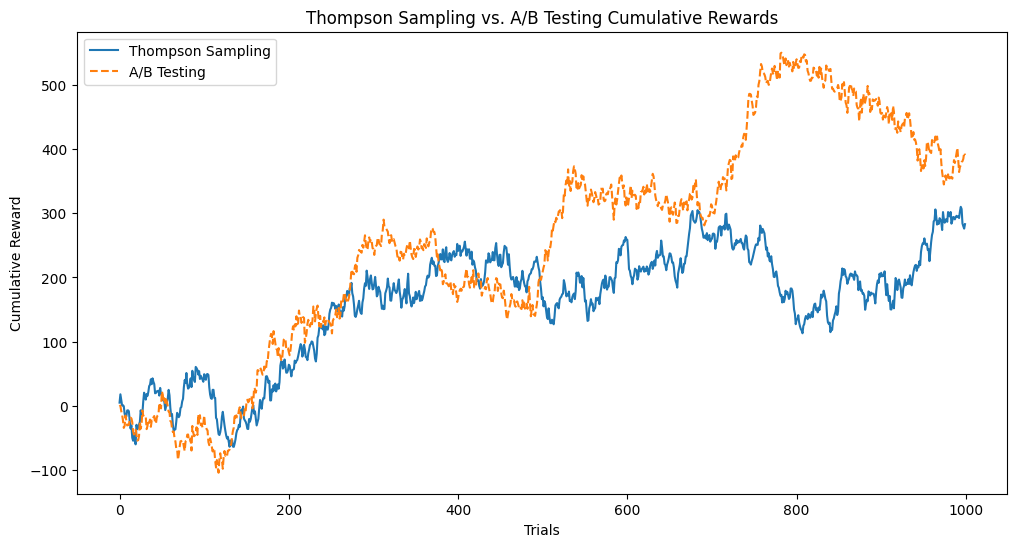

In [6]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data_ts, label="Thompson Sampling")
plt.plot(data_ab, label="A/B Testing", linestyle="--")
plt.xlabel("Trials")
plt.ylabel("Cumulative Reward")
plt.title("Thompson Sampling vs. A/B Testing Cumulative Rewards")
plt.legend()
plt.show()
